In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import math

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
data = load_breast_cancer()


In [3]:
df = pd.DataFrame(data = data.data,columns = data.feature_names)


In [4]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])



In [5]:
x = pd.DataFrame(data=data.target,columns = ["Result"])
finalDF = principalDf.join(x)
df.shape

(569, 30)

In [6]:
train, test = train_test_split(finalDF, test_size=0.2)

In [7]:
train_x = train["Result"]
test_x = test["Result"]

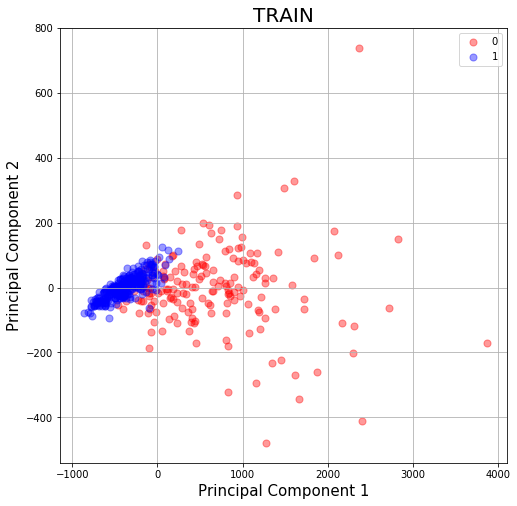

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('TRAIN', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = train['Result'] == target
    ax.scatter(train.loc[indicesToKeep, 'principal component 1']
               , train.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
              , alpha = 0.4)
ax.legend(targets)
ax.grid()


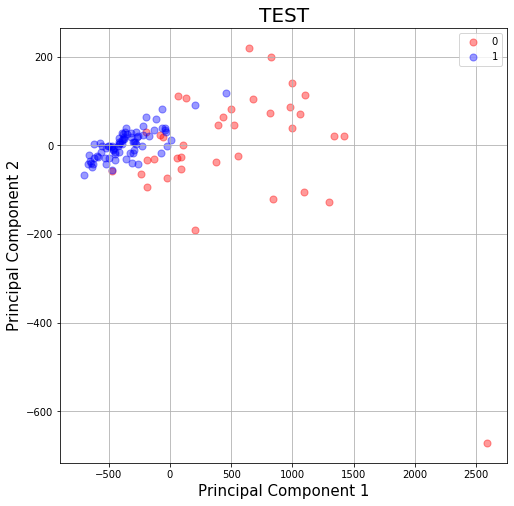

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('TEST', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = test['Result'] == target
    ax.scatter(test.loc[indicesToKeep, 'principal component 1']
               , test.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
              , alpha = 0.4)
ax.legend(targets)
ax.grid()

In [10]:
from sklearn.svm import SVC
del train["Result"]
clf = SVC(gamma='auto')
clf.fit(train, train_x) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
res = test["Result"]
del test["Result"]
a = clf.predict(test)
len(a)

114

In [12]:
a

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [13]:

test["pred"] = a
test["Results"] = res

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


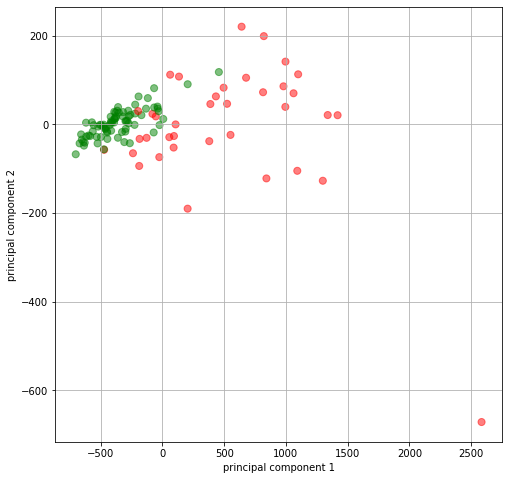

In [14]:
test["color"] = test["Results"] == test["pred"]
c = []
for i in test["color"]:
    if i:
        c.append('g')
    else:
        c.append('r')
plt = test.plot.scatter(x = "principal component 1", y="principal component 2", c = c, s = 50, alpha = 0.5,figsize = (8,8),grid = True)



In [15]:
test

,principal component 1,principal component 2,pred,Results,color
138,93.695343,-26.591725,1,0,False
193,-187.830802,-94.083801,1,0,False
395,-192.915575,62.573019,1,1,True
554,-317.926338,27.369409,1,1,True
119,495.886901,82.418786,1,0,False
453,-117.871335,58.960012,1,1,True
452,-416.941153,3.214886,1,1,True
293,-427.173310,-1.953839,1,1,True
294,-365.512135,30.500408,1,1,True
315,-379.352925,26.286313,1,1,True


In [16]:
#Grid size for test

max_1 = test.loc[test['principal component 1'].idxmax()]['principal component 1']

In [17]:
max_2 = test.loc[test['principal component 2'].idxmax()]['principal component 2']

In [18]:
min_1 = test.loc[test['principal component 1'].idxmin()]['principal component 1']

In [19]:
min_2 = test.loc[test['principal component 2'].idxmin()]['principal component 2']

In [20]:
x_axis = round((max_1 - min_1)/10)

In [21]:
y_axis = round((max_2-min_2)/10)

In [22]:
x_axis = x_axis.as_integer_ratio()[0]

In [23]:
y_axis = y_axis.as_integer_ratio()[0]

In [24]:
x_l = []
y_l = []
for i in range(0,11):
    x_l.append(round(min_1 + x_axis*i))

for i in range(0,11):
    y_l.append(round(min_2 + y_axis*i))


In [25]:
x_l

[-702.0,
 -373.0,
 -44.0,
 285.0,
 614.0,
 943.0,
 1272.0,
 1601.0,
 1930.0,
 2259.0,
 2588.0]

In [26]:
y_l

[-672.0,
 -583.0,
 -494.0,
 -405.0,
 -316.0,
 -227.0,
 -138.0,
 -49.0,
 40.0,
 129.0,
 218.0]

In [27]:
def genXY(h,data):
    """
    generate x and y grid values of height h
    """
    minx = min(data['principal component 1'])
    maxx = max(data['principal component 1']) + 1
    numDivX = round((maxx - minx)/h)
    print(numDivX)
    x_l = []
    for i in range(1,numDivX+1):
        x_l.append((i*h) +minx)
    
    if(x_l[len(x_l)-1] != maxx):
        x_l.append(maxx)
        
        
    miny = min(data['principal component 2'])
    maxy = max(data['principal component 2'])
    numDivY = round((maxy - miny)/h)
    print(numDivY)
    y_l = []
    for i in range(1,numDivY+1):
        y_l.append((i*h) + miny)
    
    if(y_l[len(y_l)-1] != maxy):
        y_l.append(maxy)
    
    return x_l,y_l
        

In [28]:
def inWindow(x1,x2,a,i):
    """
    check if value falls in parzen window
    """
    if ((a[i] <= x2) and (a[i] > x1)):
        return True
    return False

        

In [29]:
def genDensity(data,x_l,y_l):
    """
     get count of data points in a grid line and accuracy percentage
    """
    densityMap = []
    for r in data.values:
        totx = 0
        toty = 0
        for i in range(0,len(x_l)-1):
            totx = inWindow(x_l[i],x_l[i+1],r,0)
            if totx == True:
                xval = x_l[i+1]
                break
        for j in range(0,len(y_l)-1):
            toty = inWindow(y_l[j],y_l[j+1],r,1)
            if toty == True:
                yval = y_l[j+1]
                break
        if r[4] == True:
            acc = 1
        else:
            acc = 0
        densityMap.append([xval,yval,1, acc])
    
    densityMapF = pd.DataFrame(data=densityMap, columns=['x2','y2','density percentage','accuracy'])


    densityMapF = densityMapF.groupby(['x2','y2']).sum()


    densityMapF.reset_index(inplace=True)

    densityMapF['accuracy'] = densityMapF['accuracy']*100.0/densityMapF['density percentage']
    densityMapF['density percentage'] = densityMapF['density percentage']*100.0/len(data)
    
    return densityMapF
            
            
    

In [30]:
def inWindows(x1,x2,y1,y2,x,y):
    if (x >= x1 and x < x2) and (y>=y1 and y<y2):
        return True
    return False

In [44]:
def genDensityMetric(data,x_l,y_l):
    """
     get count of data points in a grid line and accuracy percentage
    """
    densityMap = []
    count = len(data)
    for x in range(len(x_l)-1):
        for y in range(len(y_l)-1):
            results = []
            preds = []
            density = 0
            for i in data.values:
                if(inWindows(x_l[x],x_l[x+1],y_l[y],y_l[y+1],i[0],i[1])):
                    results.append(i[3])
                    preds.append(i[2])
                    density = density + 1
            if density != 0:
                f1 = f1_score(results,preds)
                acc = accuracy_score(results,preds)
                rec = recall_score(results,preds)
                prec = precision_score(results,preds)
                densityMap.append([x_l[x+1],y_l[y+1],density/count,acc,f1,rec,prec])
    dm = pd.DataFrame(data = densityMap, columns=['x','y','density','accuracy score','f1 score','recall score','precision score'])
    return dm
            

In [45]:
x_l

[-702.0,
 -373.0,
 -44.0,
 285.0,
 614.0,
 943.0,
 1272.0,
 1601.0,
 1930.0,
 2259.0,
 2588.0]

In [46]:
y_l

[-672.0,
 -583.0,
 -494.0,
 -405.0,
 -316.0,
 -227.0,
 -138.0,
 -49.0,
 40.0,
 129.0,
 218.0]

In [47]:
x_l_1, y_l_1 = genXY(100,test)

33
9


In [48]:
densityMap = genDensityMetric(test,x_l_1,y_l_1)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [50]:
densityMap.sort_values(by=['density'],ascending=False)

,x,y,density,accuracy score,f1 score,recall score,precision score
1,-401.731349,28.467737,0.157895,0.944444,0.971429,1.0,0.944444
2,-301.731349,28.467737,0.114035,1.000000,1.000000,1.0,1.000000
4,-201.731349,28.467737,0.105263,0.916667,0.956522,1.0,0.916667
0,-501.731349,28.467737,0.078947,1.000000,1.000000,1.0,1.000000
11,-1.731349,128.467737,0.043860,1.000000,1.000000,1.0,1.000000
8,-101.731349,128.467737,0.035088,0.750000,0.857143,1.0,0.750000
10,-1.731349,28.467737,0.035088,0.500000,0.666667,1.0,0.500000
12,98.268651,28.467737,0.035088,0.250000,0.400000,1.0,0.250000
7,-101.731349,28.467737,0.026316,0.333333,0.500000,1.0,0.333333
20,498.268651,128.467737,0.026316,0.333333,0.500000,1.0,0.333333
